In [1]:
import test as mcsp

In [2]:
from test import model

In [3]:
from test import algorithm

In [10]:
import uuid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
m = model.Ising(10)
f = algorithm.Anneal(m)

In [6]:
f.equil_sample(1,100)

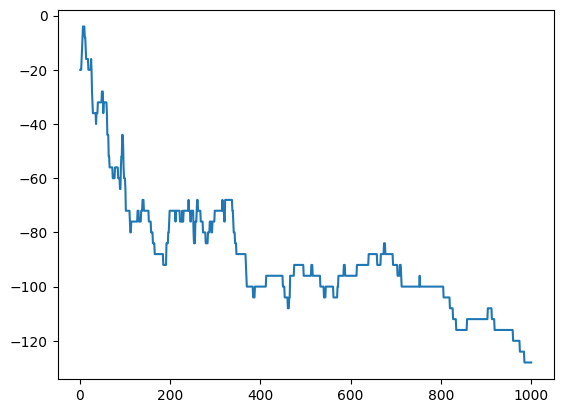

In [11]:
plt.plot(f.iter_data.loc['4ad5ae89f3ce11ed8d6bb831b5777aab']['energy'])

iter
1       -20.0
2       -20.0
3       -20.0
4       -16.0
5       -12.0
        ...  
996    -128.0
997    -128.0
998    -128.0
999    -128.0
1000   -128.0
Name: energy, Length: 1000, dtype: object